In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [23]:
from sklearn.datasets import load_wine  
# Import function to load the Wine dataset
data = load_wine()  
# Load Wine dataset into 'data' (features, labels, and info)

In [24]:
df = pd.DataFrame(
    data.data,               # Create a DataFrame using the feature data from 'data'
    columns = data.feature_names  # Use the feature names as column headers
)
df.head()                    # Display the first 5 rows of the DataFrame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
df.info()  
# Display a summary of the DataFrame:
# - number of rows and columns
# - column names
# - data types
# - non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [26]:
# Check and print the number of missing (NULL) values in each column
print(f'NULL Values:\n{df.isnull().sum()}')
# Print a separator line for clarity
print("______________________")
# Check and print the number of duplicate rows in the DataFrame
print(f'Duplicate Values: {df.duplicated().sum()}')
print("______________________")
# Returns the number of rows and columns in the DataFrame
df.shape

NULL Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64
______________________
Duplicate Values: 0
______________________


(178, 13)

In [27]:
# Purpose: Test different IQR factors to remove outliers and observe how many rows are removed

# Create a copy of the original DataFrame to preserve it
df_copy = df.copy()
# Define different IQR factors to test for outlier removal
iqr_factor = (1, 1.5, 2, 2.5, 3)
# Initialize a list to store results for each IQR factor
result = []

# Loop through each IQR factor
for k in iqr_factor:
    # Make a fresh copy of the DataFrame for each iteration
    df_temp = df_copy.copy()
    
    # Loop through each column to remove outliers
    for col in df:
        # Calculate the 25th percentile (Q1) and 75th percentile (Q3)
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)

        # Compute the Interquartile Range (IQR)
        iqr = q3 - q1

        # Calculate lower and upper whiskers based on the IQR factor
        lower_whisker = q1 - k * iqr
        upper_whisker = q3 + k * iqr

        # Keep only rows within the whiskers (remove outliers)
        df_temp = df_temp[
            (df_temp[col] <= upper_whisker) &
            (df_temp[col] >= lower_whisker)
        ]
    
    # Count how many rows were removed
    row_removed = len(df_copy) - len(df_temp)
    # Calculate the percentage of rows lost
    row_loss_percent = row_removed / len(df_copy) * 100
    # Append the results for this IQR factor
    result.append((k, len(df_copy), len(df_temp), row_loss_percent))

# Convert the results list into a DataFrame for easier viewing
df_out = pd.DataFrame(
    result,
    columns=['iqr_factor', 'total_row', 'removed_row', 'row_loss_percent']
)
# Display the DataFrame showing row removal results for each IQR factor
df_out

,iqr_factor,total_row,removed_row,row_loss_percent
0,1.0,178,118,33.707865
1,1.5,178,161,9.550562
2,2.0,178,173,2.808989
3,2.5,178,177,0.561798
4,3.0,178,178,0.000000


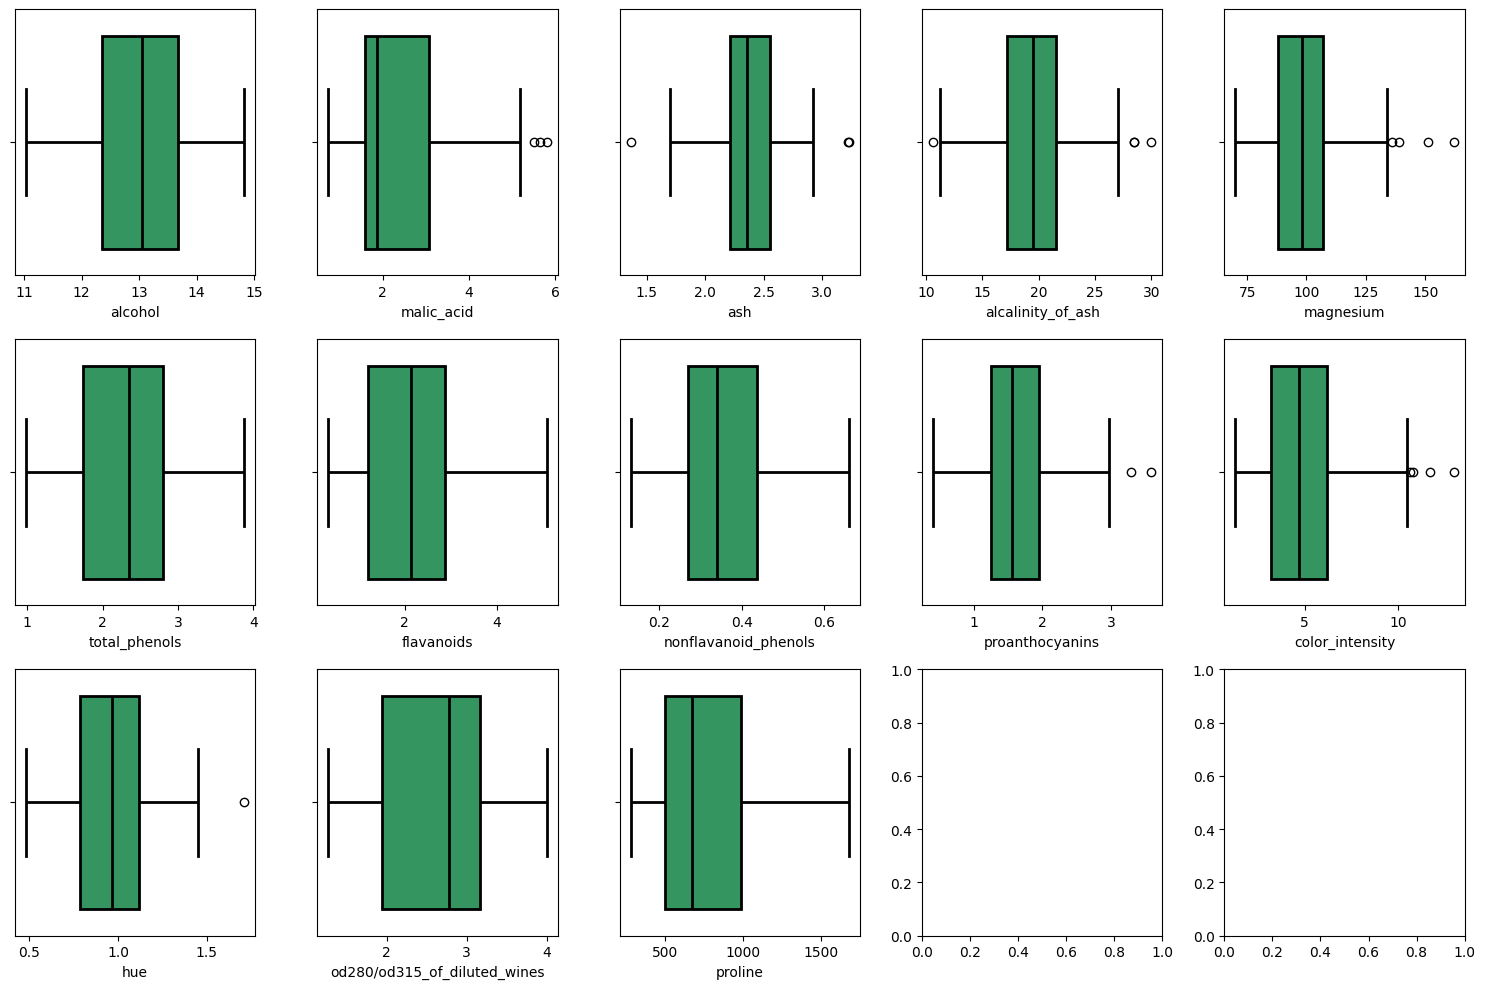

In [28]:
# Purpose: Create a grid of boxplots for all columns to compare distributions and detect outliers

# Create a 3x5 grid of subplots with a specified figure size
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
# Loop through each axis and corresponding column
for ax, col5 in zip(axes.flatten(), df.columns):
    # Draw a boxplot for the column on the specific subplot axis
    sns.boxplot(
        x=df[col5],
        ax=ax,                 # Assign to the current subplot
        color="#25A55FFF",     # Fill color of the box
        linecolor='black',     # Edge color of the box
        linewidth=2            # Thickness of box edges
    )
# Adjust subplot spacing to prevent overlap
plt.tight_layout()
# Display all boxplots
plt.show()

In [29]:
df1 = df.copy()

In [30]:
# Purpose: Remove outliers from all columns of the DataFrame using the IQR method (1.5*IQR)

# Define a function to remove outliers from a specific column
def outlier(df, col3):
    # Calculate the 25th percentile (Q1) and 75th percentile (Q3)
    q1 = df[col3].quantile(.25)
    q3 = df[col3].quantile(.75)
    # Compute the Interquartile Range (IQR)
    iqr = q3 - q1

    # Calculate lower and upper whiskers using 1.5 * IQR
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    # Keep only rows within the whiskers
    df = df[(df[col3] <= upper_whisker) & (df[col3] >= lower_whisker)]
    # Return the cleaned DataFrame
    return df

# Create a copy of the original DataFrame to preserve it
df_clean = df.copy()
# Loop through each column and remove outliers using the outlier function
for col4 in df.columns:
    df_clean = outlier(df_clean, col4)
# Update the original DataFrame with the cleaned data
df = df_clean.copy()

In [31]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

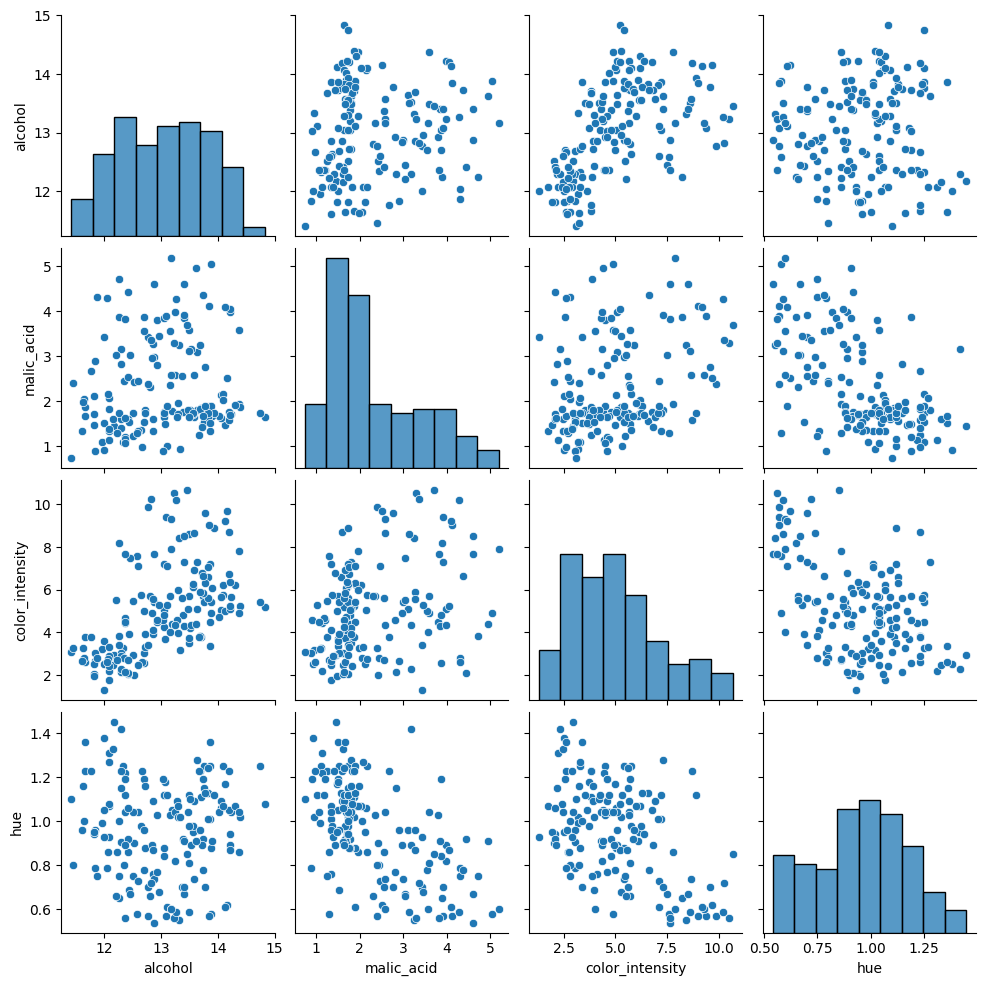

In [32]:
# Create a pairplot for selected columns
sns.pairplot(
    df,
    vars=['alcohol', 'malic_acid', 'color_intensity', 'hue']  # Columns to include in the pairplot
)
# Display the pairplot
plt.show()


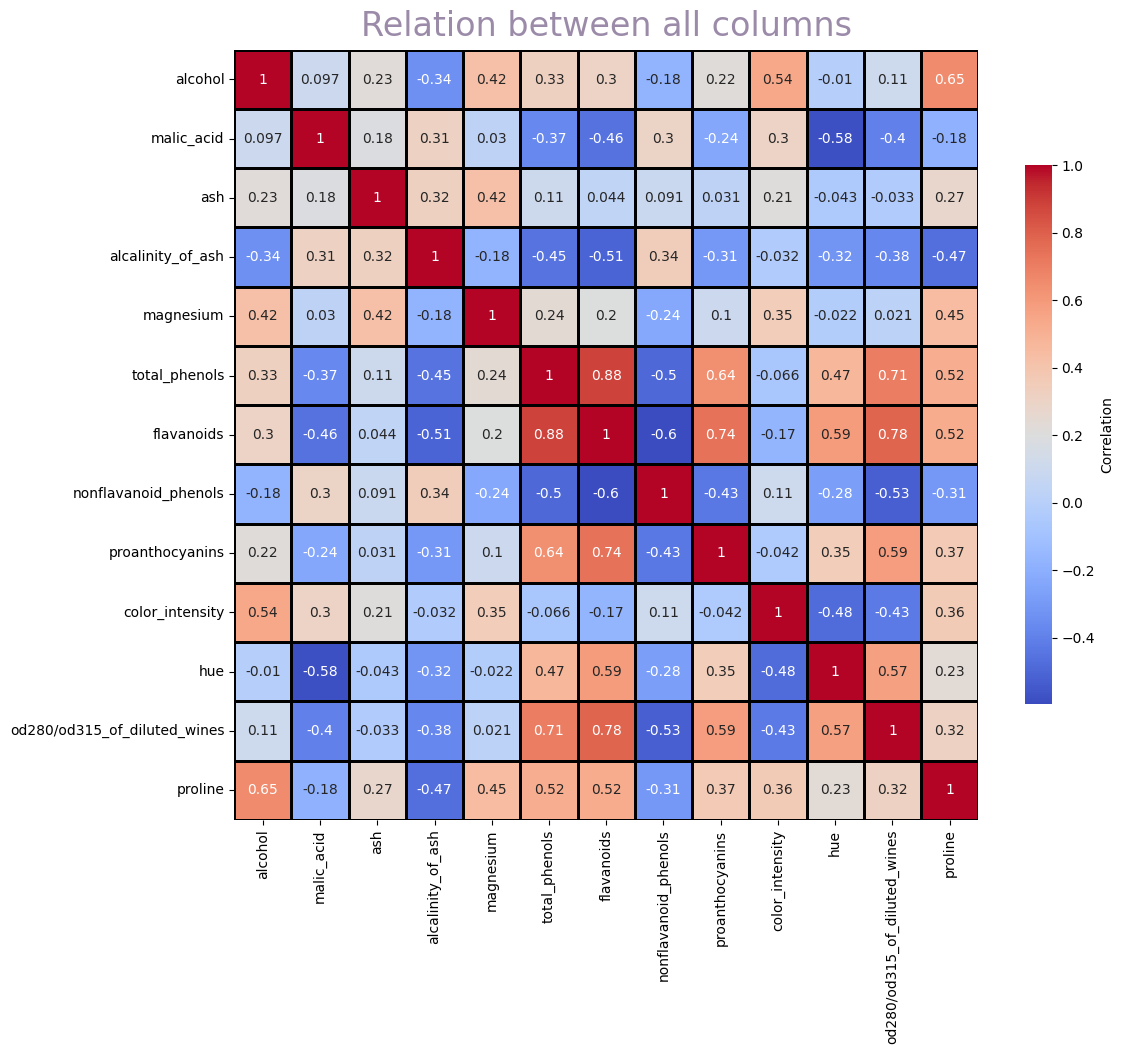

In [33]:
# Purpose: Visualize the correlation between all columns using a heatmap
# Set figure size
plt.figure(figsize=(12,10))
# Create a heatmap of the correlation matrix
sns.heatmap(
    df.corr(),               # Correlation matrix of the DataFrame
    annot=True,              # Show correlation values on the heatmap
    cmap='coolwarm',         # Colormap
    linewidths=2,            # Width of lines between cells
    linecolor='black',       # Color of lines between cells
    cbar=True,               # Display color bar
    cbar_kws={               # Customize color bar
        'shrink': 0.7,       # Shrink size of color bar
        'label': 'Correlation'  # Label for color bar
    }
)
# Set title for the heatmap
plt.title(
    'Relation between all columns',  # Title text
    color="#26034475",               # Title color
    fontsize=24,                     # Title font size
    pad=10                           # Padding above the plot
)
# Display the heatmap
plt.show()

In [34]:
# Purpose: Standardize selected numerical features using StandardScaler

# Create a StandardScaler object
stand = StandardScaler()
# Loop through each selected column
for col6 in df.columns:
    # Fit the scaler and transform the column, then update the DataFrame
    df[col6] = stand.fit_transform(df[[col6]])

In [35]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401


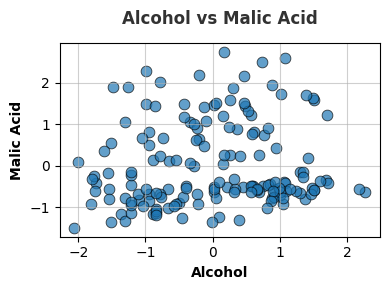

In [36]:
plt.figure(figsize=(4, 3))  # Create a figure with a compact size
sns.scatterplot(
    data=df,                 # Dataset to plot from
    x='alcohol',             # X-axis feature
    y='malic_acid',          # Y-axis feature
    s=60,                    # Size of scatter points
    alpha=0.7,               # Transparency of points
    edgecolor='black'        # Border color of points
)
plt.title(
    'Alcohol vs Malic Acid', # Plot title
    color='#323232',         # Title color
    pad=14,                  # Space between title and plot
    fontweight='bold'        # Make title bold
)
plt.xlabel('Alcohol', fontsize=10, fontweight='bold')      # X-axis label
plt.ylabel('Malic Acid', fontsize=10, fontweight='bold')   # Y-axis label
plt.grid(True, alpha=0.6)  # Add light dashed grid
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()          # Display the plot


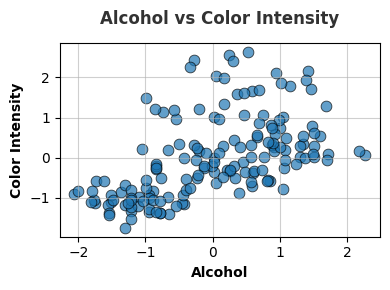

In [43]:
plt.figure(figsize=(4, 3))  # Create a figure with a compact size
sns.scatterplot(
    data=df,                 # Dataset to plot from
    x='alcohol',             # X-axis feature
    y='color_intensity',          # Y-axis feature
    s=60,                    # Size of scatter points
    alpha=0.7,               # Transparency of points
    edgecolor='black'        # Border color of points
)
plt.title(
    'Alcohol vs Color Intensity', # Plot title
    color='#323232',         # Title color
    pad=14,                  # Space between title and plot
    fontweight='bold'        # Make title bold
)
plt.xlabel('Alcohol', fontsize=10, fontweight='bold')      # X-axis label
plt.ylabel('Color Intensity', fontsize=10, fontweight='bold')   # Y-axis label
plt.grid(True, alpha=0.6)  # Add light dashed grid
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()          # Display the plot

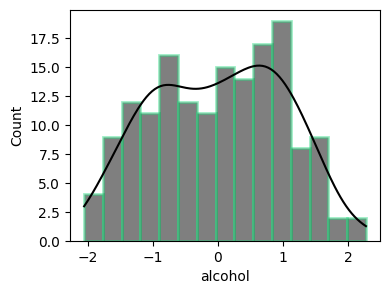

In [58]:
# Purpose: Visualize the distribution of the 'alcohol' feature using a histogram with KDE
# Set the figure size
plt.figure(figsize=(4,3))
# create a histogram for the 'alcohol' column
sns.histplot(
    data=df,              # Dataset to use for plotting
    x='alcohol',         # Column to plot
    color="#000000",     # Color of the histogram bars
    kde=True,
    linewidth=2,         # Thickness of bar edges
    edgecolor="#2BDA8275", # Color of bar edges
    bins=15              # Number of bins in the histogram
)
# Display the histogram
plt.show()

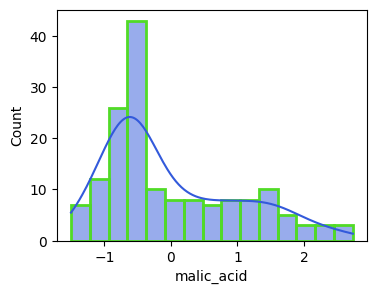

In [57]:
# Purpose: Visualize the distribution of the 'malic_acid' feature using a histogram with KDE

# Set the figure size
plt.figure(figsize=(4,3))

# Create a histogram for the 'malic_acid' column
sns.histplot(
    data=df,              # Dataset to use for plotting
    x='malic_acid',      # Column to plot
    color="#335ADB",     # Color of the histogram bars
    kde=True,            # Show Kernel Density Estimation curve
    linewidth=2,         # Thickness of bar edges
    edgecolor="#51DB26", # Color of bar edges
    bins=15              # Number of bins in the histogram
)
# Display the histogram
plt.show()


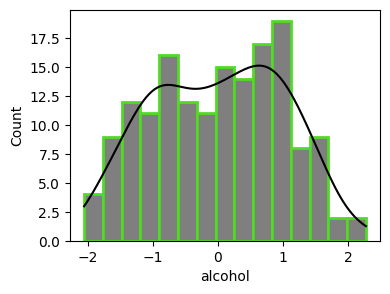

In [44]:
# Purpose: Visualize the distribution of the 'alcohol' feature using a histogram with KDE
# Set the figure size
plt.figure(figsize=(4,3))
# create a histogram for the 'alcohol' column
sns.histplot(
    data=df,              # Dataset to use for plotting
    x='alcohol',         # Column to plot
    color="#000000",     # Color of the histogram bars
    kde=True,
    linewidth=2,         # Thickness of bar edges
    edgecolor="#51DB26", # Color of bar edges
    bins=15              # Number of bins in the histogram
)
# Display the histogram
plt.show()

In [59]:
wcss = []
clus = range(2,15)
for k in clus:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df[['alcohol', 'malic_acid']])
    wcss.append(kmean.inertia_)
wcss

[195.48317837278142,
 93.54445346618002,
 71.98963811962409,
 58.62434966257881,
 53.601107289625546,
 45.60819027985555,
 43.479318279834345,
 34.35708791207273,
 28.244128511111,
 26.867441160282635,
 23.690823099613713,
 23.474181588600032,
 19.277500451773395]

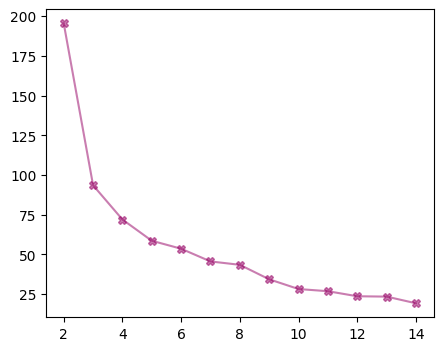

In [60]:
plt.figure(figsize=(5,4))
plt.plot(clus, wcss, color='#98056784', marker='X')
plt.show()

<Figure size 300x200 with 0 Axes>

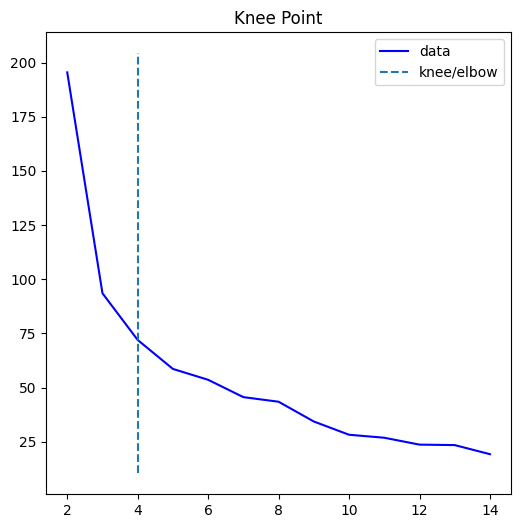

In [65]:
plt.figure(figsize=(3,2))
knl = KneeLocator(clus, wcss, direction="decreasing", curve='convex')
knl.plot_knee()
plt.show()

In [66]:
kmean3 = KMeans(n_clusters=4)
final_model1 = kmean3.fit(df[['alcohol', 'malic_acid']])
final_model1

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [67]:
pred1 = final_model1.predict(df[['alcohol', 'malic_acid']])
pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 3, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 0, 3, 3, 2, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 3, 0, 3, 3, 2, 0, 0, 3, 2, 0,
       3, 1, 2, 0, 0, 2, 0], dtype=int32)

In [69]:
center1 = final_model1.cluster_centers_
center1

array([[ 0.63376966,  1.54328385],
       [-1.0251809 , -0.6595587 ],
       [ 0.85565249, -0.50688728],
       [-0.69833666,  1.14053619]])

In [71]:
s_score = silhouette_score(
    df[['alcohol', 'malic_acid']],
    final_model1.labels_
)
s_score

0.46774696007197136

In [46]:
wcss2 = []
for k in range(2,15):
    kmean2 = KMeans()
    kmean2.fit(df[['alcohol', 'color_intensity']])
    wcss2.append(kmean2.inertia_)
wcss2

[30.437594868559806,
 32.943517946325976,
 31.974430734494117,
 29.474438564626666,
 29.736561598775694,
 29.34586135773284,
 30.710862055466265,
 30.710862055466265,
 29.064354986483703,
 29.166251556091986,
 29.064354986483703,
 30.44561794665348,
 30.4719293270323]

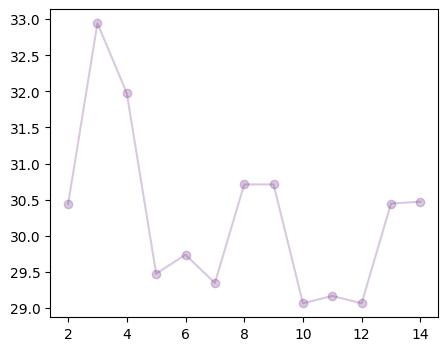

In [49]:
plt.figure(figsize=(5,4))
plt.plot(range(2,15), wcss2, color="#74368f45", marker='o')
plt.show()